## Analysis of Yelp Dataset Portfolio2 

The portfolio aims to use various data processing techniques to clean and preprocess the data, filter out irrelevant data, and remove any outliers that could impact the accuracy of the model. Finally, the portfolio aims to use linear regression models to train and validate the model's accuracy in predicting user ratings towards business. Ultimately, the objective is to build a reliable model that can be used to provide insights into user preferences and help businesses make data-driven decisions to improve their services and offerings. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use Yelp sub-dataset.

### Import the output sample data from Portfolio1
The csv file named `Yelp_Portfolio2_Input.csv` is provided. You may need to use the Pandas method, i.e., `read_csv`, for doing this. After that, please import the csv file and print out its total length.

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
sample_data = pd.read_csv('Yelp_Portfolio2_Input.csv')
print(len(sample_data))

38654


In [3]:
sample_data.head()

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
1,Tattoo; Beauty & Spas,Tempe,WGNIYMeXPyoWav1APUq7jA,23/12/2011,4,"Good tattoo shop. Clean space, multiple artist...",2,Xm8HXE1JHqscXe5BKf0GFQ
2,Tires; Automotive,Glendale,rxQ2PIjhAx6dgAqUalf99Q,9/9/2012,5,Never having dealt with a Discount Tire in Pho...,0,HLbhD2OyiMCUDRR4c1iXaw
3,Sushi Bars; Restaurants,Tempe,EC9WB-iVjd28B6R6KIZ8TA,4/8/2010,4,Cliff notes\n- Cheap: $1-2/plate\n- Fast: It's...,0,jdoGEEy5s-5L1O_lNzEi2g
4,Arts & Entertainment; Cinema,Tempe,LDJhwZN14AZOJyHjg2lkRw,13/12/2011,4,We got passes for the preview of Mission Impos...,0,Mb0psF4WQF7gZSuZafVr-g


# Q1. `business_categories` processing

You may notice that there are a total of 693 unique business categories present in the sample data. Please write a code snippet to confirm this number. Then, generate a boxplot of `stars` for `business_categories`.

Number of Unique businesses: 693


<AxesSubplot:xlabel='stars', ylabel='business_categories'>

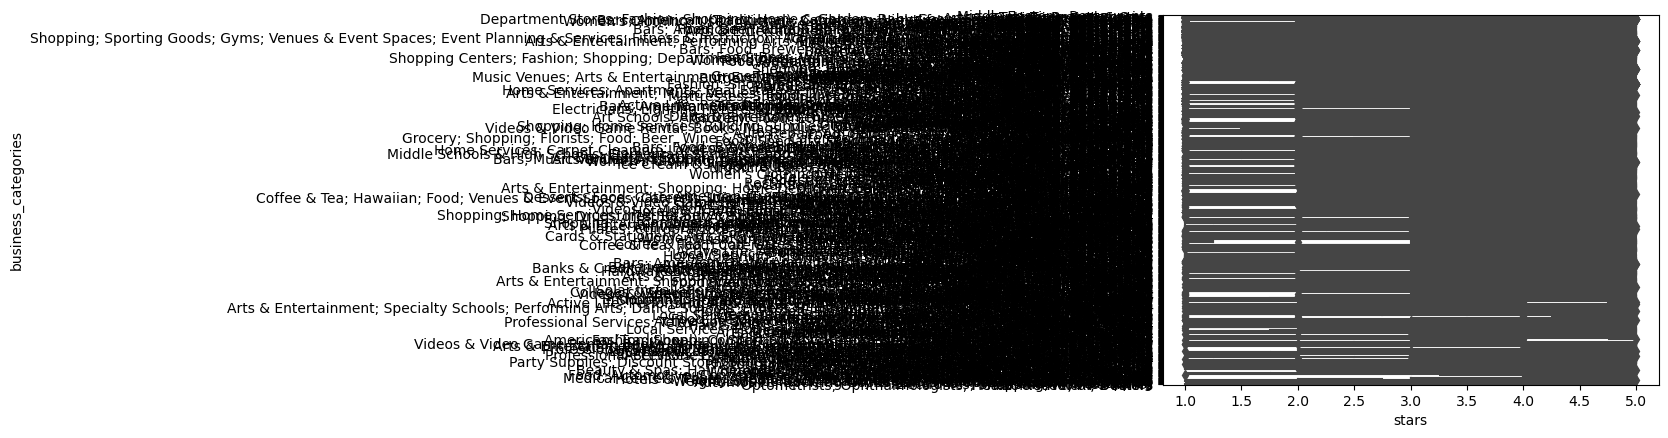

In [4]:
# Verifying if unique businesses are 693 and plotting those in a boxplot

uniqueBusiness = sample_data['business_categories'].unique().tolist()
print('Number of Unique businesses: ' +str(len(uniqueBusiness)))
sns.boxplot(x='stars', y='business_categories', data = sample_data)

Sometimes we need to extract some major categories, such as `Middle Eastern; Restaurants` and `Sushi Bars; Restaurants`, both of which should belong to the `Restaurants` category.

### Q1.1 How to efficiently and accurately extract the last category value (i.e., categorieN) from the `business_categories` column in a dataset, where the format of each row is a semicolon-separated list of categories (i.e., 'categorie1; categorie2;...;categorieN')? and replace the original string with this last category value. At last, print the first five rows.

In [9]:
# Filtering business categories by only considering Nth category from the Business Category column

business_categories = sample_data['business_categories'].str.split(';').str[-1]
#print(business_categories)
sample_data['business_categories'] = business_categories
business_categories1 = sample_data['business_categories'].str.split(' ').str[-1]
sample_data['business_categories'] = business_categories1
print(sample_data.head(5))
print(len(sample_data))

  business_categories business_city             business_id        date  \
0         Restaurants         Tempe  6oRAC4uyJCsJl1X0WZpVSA   14/6/2012   
1                Spas         Tempe  WGNIYMeXPyoWav1APUq7jA  23/12/2011   
2          Automotive      Glendale  rxQ2PIjhAx6dgAqUalf99Q    9/9/2012   
3         Restaurants         Tempe  EC9WB-iVjd28B6R6KIZ8TA    4/8/2010   
4              Cinema         Tempe  LDJhwZN14AZOJyHjg2lkRw  13/12/2011   

   stars                                               text  useful  \
0      4  love the gyro plate. Rice is so good and I als...       1   
1      4  Good tattoo shop. Clean space, multiple artist...       2   
2      5  Never having dealt with a Discount Tire in Pho...       0   
3      4  Cliff notes\n- Cheap: $1-2/plate\n- Fast: It's...       0   
4      4  We got passes for the preview of Mission Impos...       0   

                  user_id  
0  0hT2KtfLiobPvh6cDC8JQg  
1  Xm8HXE1JHqscXe5BKf0GFQ  
2  HLbhD2OyiMCUDRR4c1iXaw  
3  jdoGEEy

### Q1.2 Let's first check how many unique business categories are present in the dataset (output from Q1.1). Maybe it's still not an appropriate number to make a clear Boxplot. Now, we want to display `ALL Rows` of the business category count data. That is to count and print the number of occurrences for each business category.

In [10]:
# Printing number of occurrences for each business category and count

uniqueCount = sample_data["business_categories"].value_counts()
print(uniqueCount)
print(len(uniqueCount))

Restaurants      25212
Tea               1116
Shopping          1099
Italian            960
Yogurt             728
                 ...  
Orthodontists        3
Hauling              3
Photography          3
Therapy              3
Doctors              3
Name: business_categories, Length: 139, dtype: int64
139


### Q1.3 We want to remove categories that appear fewer than 200 times. Write a Python code snippet to perform this operation. At last, print the number of resulting unique business_categories.

In [11]:
# Removing business categories where number of occurences is less than 200 and printing those businesses

businessSet = uniqueCount[uniqueCount >= 200]
#businessSet.columns = ['business_categories','count']
businessSet= businessSet.index.tolist()
print(businessSet)
print(len(businessSet))

['Restaurants', 'Tea', 'Shopping', 'Italian', 'Yogurt', 'Hotels', 'Spas', 'Stores', 'Nightlife', 'Services', 'Grocery', 'Food', 'Venues', 'Instruction', 'Automotive', 'Arenas', 'Spirits', 'Parks', 'Salons', 'Cinema', 'Bookstores']
21


# Q2. Outliers

### Q2.1 Remove any rows from the sample_data DataFrame (output from Q1.3) where the `useful` column has a value of 6 or more; Then, create a single figure with two subplots, one showing the boxplot of `useful` column of the original data and the other showing the boxplot of the data with outliers removed. 

At last, __print the length of the data__.

      business_categories business_city             business_id        date  \
0             Restaurants         Tempe  6oRAC4uyJCsJl1X0WZpVSA   14/6/2012   
1                    Spas         Tempe  WGNIYMeXPyoWav1APUq7jA  23/12/2011   
2              Automotive      Glendale  rxQ2PIjhAx6dgAqUalf99Q    9/9/2012   
3             Restaurants         Tempe  EC9WB-iVjd28B6R6KIZ8TA    4/8/2010   
4                  Cinema         Tempe  LDJhwZN14AZOJyHjg2lkRw  13/12/2011   
...                   ...           ...                     ...         ...   
38648         Restaurants         Tempe  rwQIBAM_kHtVl1Ks8Flexw   28/8/2010   
38649         Restaurants      Glendale  sbnCG3-CouwIu0jsApfCsQ   26/2/2010   
38651         Restaurants         Tempe  c8XlQvVNwKhH9BOHEObtNQ  16/12/2011   
38652         Restaurants         Tempe  vnffHkFJbmd-J3OaBbK2Eg   14/4/2011   
38653         Restaurants         Tempe  YQvg0JCGRFUkb6reMMf3Iw   18/1/2011   

       stars                                       

<Figure size 500x400 with 0 Axes>

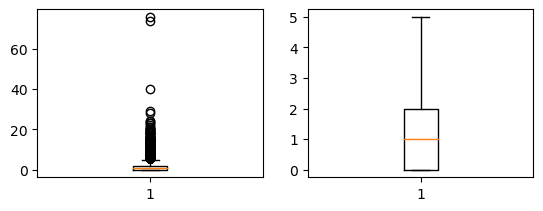

In [12]:
# Removing rows in which useful score is more than 6

filter_sample = sample_data[sample_data['business_categories'].isin(businessSet)]
filter_sample1 = filter_sample[(filter_sample['useful']<6)]
plt.figure(figsize=(5, 4))
fig, axs  = plt.subplots(1, 2)
plt.subplot(221)
plt.boxplot(x='useful', data=filter_sample)
plt.subplot(222)
plt.boxplot(x='useful', data=filter_sample1)
print(filter_sample1)
print("Length of Sample data where useful score is more than 6 is " +str(len(filter_sample1)))


### Q2.2 In general, we might remove some inactive users from a dataset (output from Q2.1), for example, users who rate businesses less than 3 times. However, in this case, we are doing the opposite and removing extremely active users who rate businesses more than 30 times (>30). Again, create a single figure with two subplots, one showing the boxplot of the count of business rating given by each user and the other showing the boxplot of the data with outliers removed. 

At last, __print the length of the data__.

Length of datafarme: 30552


<Figure size 1000x500 with 0 Axes>

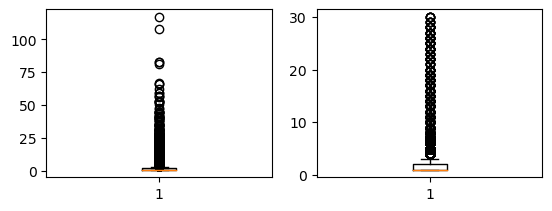

In [44]:
# plotting boxplots where business user is not very active before and after removing outliers

activeCount = filter_sample1.groupby("user_id")['stars'].count().reset_index(name='count')
removeUsers = activeCount[activeCount['count']<=30]['user_id'].tolist()
#print(removeUsers)
#originalUsers = sample_data['user_id'].value_counts()
#len(originalUsers)
dataFrame1 = filter_sample1[filter_sample1['user_id'].isin(removeUsers)]
print("Length of datafarme: " +str(len(dataFrame1)))
df1 = dataFrame1.groupby("user_id")['stars'].count().reset_index(name='count')
plt.figure(figsize=(10, 5))
fig, axs  = plt.subplots(1, 2)
plt.subplot(221)
plt.boxplot(x='count', data=activeCount)
plt.subplot(222)
plt.boxplot(x='count', data=df1)

plt.show()

# Q3. Training a LinearRegression model on the data output from Q2.2.

### Q3.1 How to build a linear regression model on a subset of the data, using the `useful` column as the input variable and the `stars` column as the output variable. Split the data into a training set and a test set, with 70% of the data used for training. The random_state is set to 42.

In [50]:
# Linear regression model for useful column and stars column 

reg = linear_model.LinearRegression()
train,test = train_test_split(dataFrame1, test_size=0.3, random_state =42)
x = dataFrame1['useful']
y = dataFrame1['stars']

x_train = train[['useful']]
y_train = train[['stars']]

x_test = test[['useful']]
y_test = test[['stars']]

reg.fit(x_train, y_train)

LinearRegression()

In [52]:
predicted = reg.predict(x_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
rmse = np.sqrt(mean_squared_error(y_test,predicted))
print("MSE:", mse)
print("R Squared:", r2)
print("RMSE: ", rmse)

MSE: 1.5365596214789996
R Squared: 0.0066458862102733995
RMSE:  1.2395804215455324


### Q3.2 Assuming that the number of reviews a business has received  `business_review_count`  can greatly influence the average rating that the business has received. Now, we create the relevant variable to the data, and do the LinearRegression again to the `stars`. 

In [53]:
# linear regression between business review count and stars

business_review_count = dataFrame1.groupby(['business_id'])['text'].count().reset_index()

business_review_count.columns = ['business_id', 'business_review_count']
new_df = pd.merge(dataFrame1, business_review_count, on = 'business_id')
print(new_df)

      business_categories business_city             business_id        date  \
0             Restaurants         Tempe  6oRAC4uyJCsJl1X0WZpVSA   14/6/2012   
1             Restaurants         Tempe  6oRAC4uyJCsJl1X0WZpVSA   22/3/2012   
2             Restaurants         Tempe  6oRAC4uyJCsJl1X0WZpVSA    8/7/2011   
3             Restaurants         Tempe  6oRAC4uyJCsJl1X0WZpVSA   24/7/2012   
4             Restaurants         Tempe  6oRAC4uyJCsJl1X0WZpVSA   20/4/2010   
...                   ...           ...                     ...         ...   
30547         Restaurants      Glendale  L6Qumi_rEtOAfX2FQXm06Q   10/2/2011   
30548         Restaurants         Tempe  usFRiWAy6rlqskSTPPxrwg   14/1/2009   
30549         Restaurants         Tempe  xjNrD2KlDvY2mA1JceVCZA  11/10/2010   
30550         Restaurants         Tempe  xjNrD2KlDvY2mA1JceVCZA  27/12/2012   
30551            Shopping      Glendale  Fo1ttGuJfqKkbUCBVSNxXg  26/11/2012   

       stars                                       

In [64]:
x1 = new_df[['business_review_count']]
y1 = new_df['stars']

x_train,x_test,y_train, y_test = train_test_split(x1,y1, test_size=0.3, random_state =42)

reg.fit(x_train, y_train)


LinearRegression()

In [67]:
predicted = reg.predict(x_test)
#mse = ((np.array(y1)-predicted)**2).sum()/len(y1)
#r2 = r2_score(y1, predicted)
#print("MSE:", mse)
#print("R Squared:", r2)
rmse = np.sqrt(mean_squared_error(y_test,predicted))
print("RMSE: ", rmse)

RMSE:  1.2138436440907796


### Q3.3 Output the correlations between `business_review_count` and `useful` variables with `stars` and analyze the results.

In [70]:
# Correlation between Business Review Count and stars

corr1 = new_df['business_review_count'].corr(new_df['stars'])
print("The correlation between business review ount and stars is: " +str(corr1))

The correlation between business review ount and stars is: 0.14684886627188798


In [72]:
# Correlation between Useful and Stars
correlation = filter_sample1['useful'].corr(filter_sample1['stars'])
print("The correlation between useful and stars is : " +str(correlation))

the correlation between useful and stars is : -0.07341723068974092


1. The correlation between business review count and stars is 0.146848866. It has a positive correlation between those two meaning if stars increases, business review count will also increase. But since the value of correlation is low it has only a slight dependency in the each other.
2. The correlation between useful and stars is negative. It has a value of -0.0734172. Since it has negative correlation, it is vice versa to the above point, where increase in useful will have a decrease of value in stars. but it have very low dependency